In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from feature_selector import FeatureSelector
import re

In [60]:
#figure(num=None, figsize=(15, 12), dpi=80, facecolor='w', edgecolor='k')
train=pd.read_csv('data.csv', sep=',')
train = train.dropna(subset = ["serial_number"])
train_labels = train['failure']
train.head()

train = train.drop(columns = ['failure', 'date', 'm', 'serial_number','days_to_fail', 'model'])
l=[]
for i in train.columns.values:
    x = i.endswith("normalized")
    if not x:
        l.append(i)

train = train.drop(columns = l)
        
fs = FeatureSelector(data = train, labels = train_labels)
print(train.head())

   smart_1_normalized  smart_2_normalized  smart_3_normalized  \
0               108.0                 NaN                92.0   
1               118.0                 NaN                92.0   
2               117.0                 NaN                92.0   
3               117.0                 NaN                92.0   
4               114.0                 NaN                92.0   

   smart_4_normalized  smart_5_normalized  smart_7_normalized  \
0               100.0               100.0                83.0   
1               100.0               100.0                83.0   
2               100.0               100.0                83.0   
3               100.0               100.0                83.0   
4               100.0               100.0                83.0   

   smart_8_normalized  smart_9_normalized  smart_10_normalized  \
0                 NaN                56.0                100.0   
1                 NaN                56.0                100.0   
2                 Na

42 features with greater than 0.60 missing values.



,missing_fraction
smart_252_normalized,1.0
smart_11_raw,1.0
smart_224_normalized,1.0
smart_195_raw,1.0
smart_13_raw,1.0
smart_15_normalized,1.0
smart_15_raw,1.0
smart_22_normalized,1.0
smart_22_raw,1.0
smart_223_raw,1.0


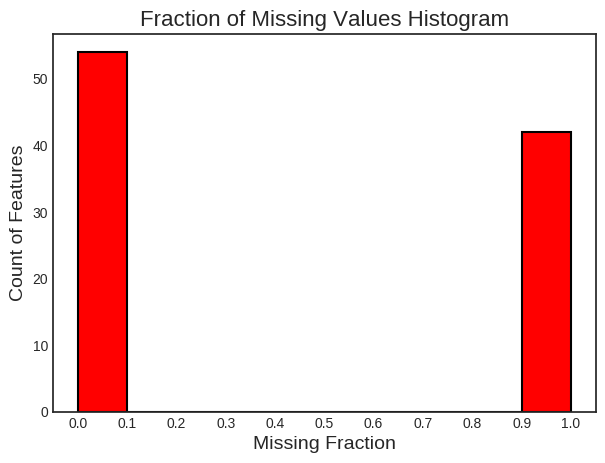

In [34]:
fs.identify_missing(missing_threshold=0.6)
missing_features = fs.ops['missing']
missing_features[:10]
fs.plot_missing()
fs.missing_stats.head(10)

14 features with a single unique value.



,nunique
smart_197_normalized,24
smart_222_normalized,0
smart_194_raw,32
model,1
smart_252_normalized,0


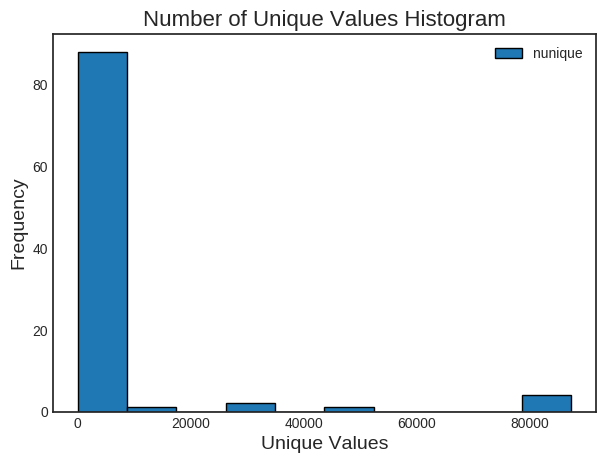

In [35]:
fs.identify_single_unique()
single_unique = fs.ops['single_unique']
single_unique
fs.plot_unique()
fs.unique_stats.sample(5)

/home/gaurav/.local/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


11 features with a correlation magnitude greater than 0.97.

11 features with a correlation magnitude greater than 0.98.



,corr_feature,corr_value,drop_feature
0,smart_5_normalized,-0.996782,smart_5_raw
1,smart_9_normalized,-0.999621,smart_9_raw
2,smart_184_normalized,-1.000000,smart_184_raw
3,smart_189_normalized,-1.000000,smart_189_raw
4,smart_190_normalized,-1.000000,smart_190_raw


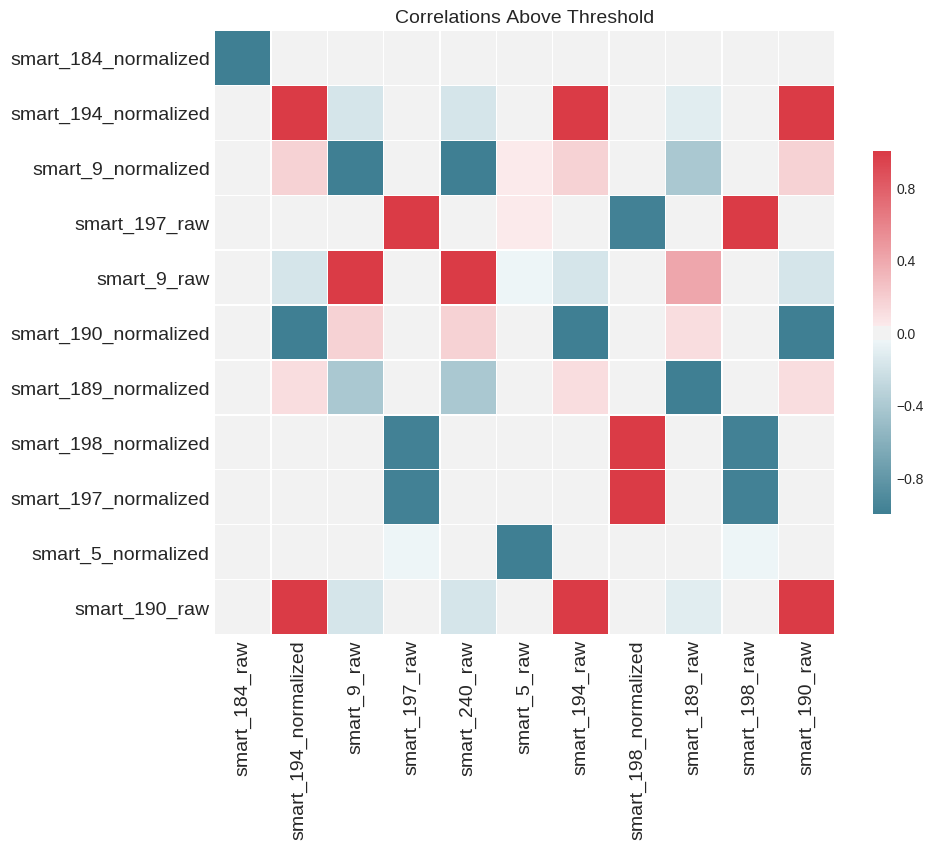

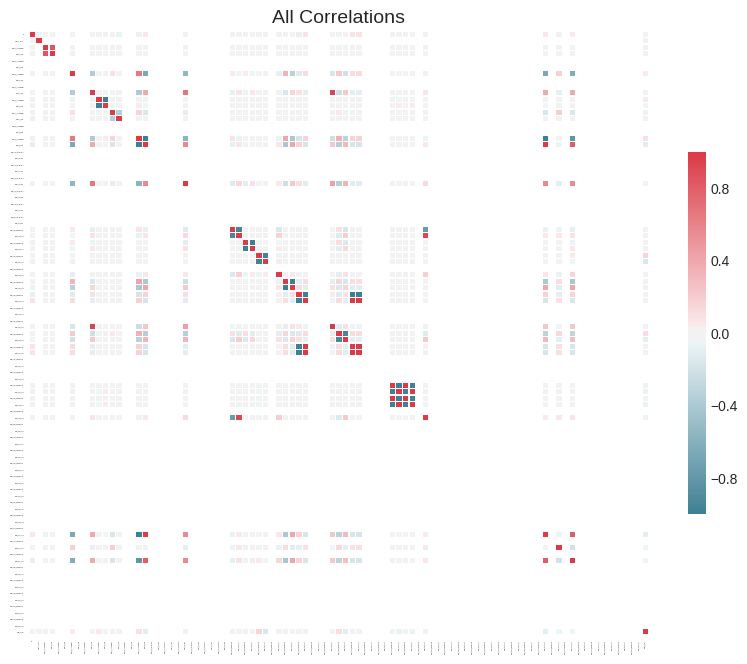

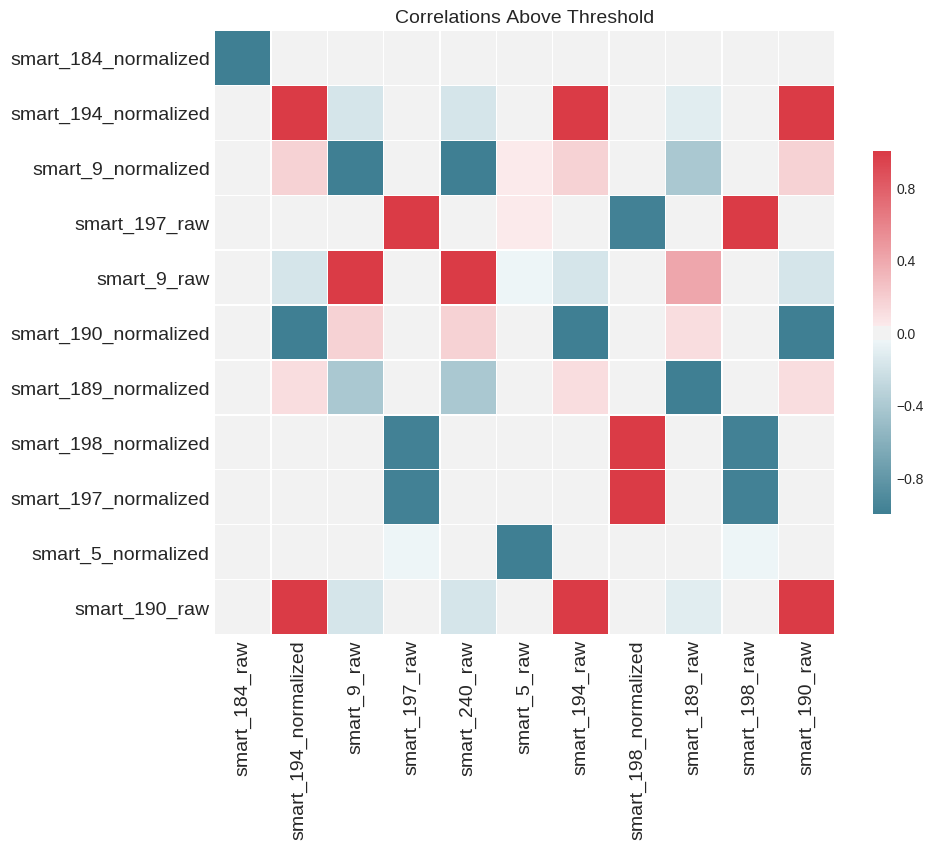

In [36]:
fs.identify_collinear(correlation_threshold=0.975)
correlated_features = fs.ops['collinear']
correlated_features[:5]
fs.plot_collinear()
fs.plot_collinear(plot_all=True)
fs.identify_collinear(correlation_threshold=0.98)
fs.plot_collinear()
fs.record_collinear.head()


In [38]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', n_iterations = 10, early_stopping = True)
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.00701763
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0070724
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0070724
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.0068735
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.00716382
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 1	valid_0's binary_logloss: 0.00709911
Training until validation scores 

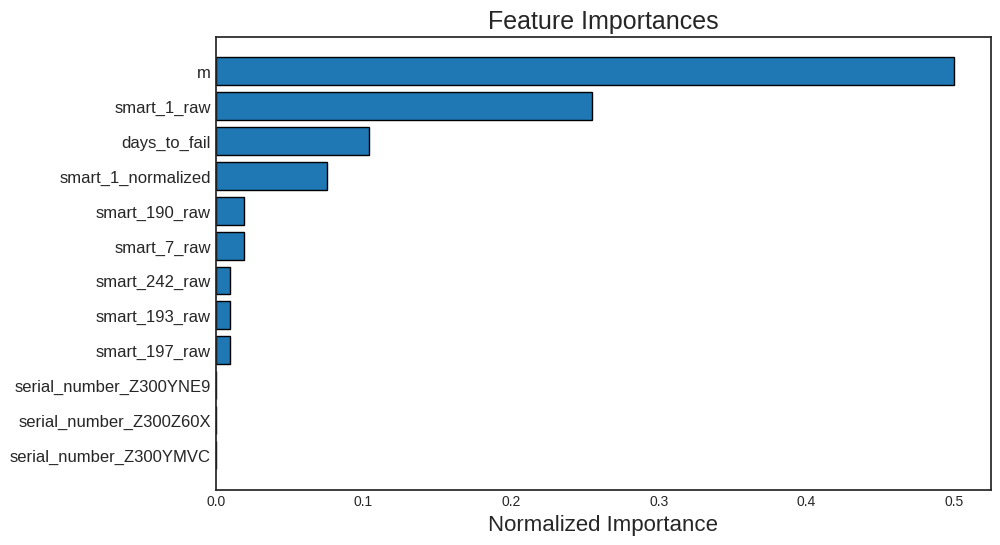

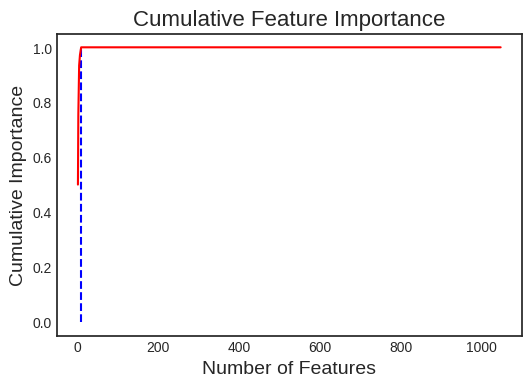

8 features required for 0.99 of cumulative importance


In [41]:
fs.data_all.head(10)
zero_importance_features = fs.ops['zero_importance']
zero_importance_features
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [44]:
print(fs.feature_importances.head(10))
one_hundred_features = list(fs.feature_importances.loc[:99, 'feature'])
len(one_hundred_features)



                  feature  importance  normalized_importance  \
0                       m         5.3               0.500000   
1             smart_1_raw         2.7               0.254717   
2            days_to_fail         1.1               0.103774   
3      smart_1_normalized         0.8               0.075472   
4           smart_190_raw         0.2               0.018868   
5             smart_7_raw         0.2               0.018868   
6           smart_242_raw         0.1               0.009434   
7           smart_193_raw         0.1               0.009434   
8           smart_197_raw         0.1               0.009434   
9  serial_number_Z300YNE9         0.0               0.000000   

   cumulative_importance  
0               0.500000  
1               0.754717  
2               0.858491  
3               0.933962  
4               0.952830  
5               0.971698  
6               0.981132  
7               0.990566  
8               1.000000  
9               1.000000 

100

In [46]:
fs.identify_low_importance(cumulative_importance = 0.99)
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

7 features required for cumulative importance of 0.99 after one hot encoding.
1041 features do not contribute to cumulative importance of 0.99.



['smart_193_raw',
 'serial_number_Z300YNFV',
 'serial_number_Z300Z2VD',
 'serial_number_Z300YV3W',
 'serial_number_Z300XQ6V']

In [47]:
train_no_missing = fs.remove(methods = ['missing'])
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])
all_to_remove = fs.check_removal()
all_to_remove[10:25]
train_removed = fs.remove(methods = 'all')
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Removed 42 features.
Removed 1039 features.
Total of 1043 features identified for removal
['missing', 'single_unique', 'zero_importance', 'collinear', 'low_importance'] methods have been run

Removed 1043 features.
['missing', 'single_unique', 'zero_importance', 'collinear', 'low_importance'] methods have been run

Removed 1043 features including one-hot features.
Original Number of Features 96
Final Number of Features:  8


In [54]:
train_removed_all.head()

,m,date,serial_number,smart_1_normalized,smart_1_raw,smart_7_raw,smart_242_raw,days_to_fail
0,13548,2017-12-31,Z300GZ1B,108.0,17846936.0,211712819.0,3.719776e+11,0
1,13593,2017-12-30,Z300GZ1B,118.0,200181504.0,211555579.0,3.719230e+11,1
2,13593,2017-12-29,Z300GZ1B,117.0,163745776.0,211462149.0,3.718898e+11,2
3,13593,2017-12-28,Z300GZ1B,117.0,127094008.0,211368658.0,3.718561e+11,3
4,13593,2017-12-27,Z300GZ1B,114.0,64177040.0,211266071.0,3.718197e+11,4


In [3]:
#############################################################
#------------------------------------------------------------


fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

42 features with greater than 0.60 missing values.

13 features with a single unique value.



/home/gaurav/.local/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


11 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.0357979	valid_0's auc: 0.796039
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[59]	valid_0's binary_logloss: 0.0306959	valid_0's auc: 0.832277
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[61]	valid_0's binary_logloss: 0.0376409	valid_0's auc: 0.806975
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.035787	valid_0's auc: 0.83524
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[73]	valid_0's binary_logloss: 0.0367266	valid_0's auc: 0.78419
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration

In [6]:
train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)
fs.feature_importances

['low_importance', 'single_unique', 'missing', 'zero_importance', 'collinear'] methods have been run

Removed 72 features.


,feature,importance,normalized_importance,cumulative_importance
0,smart_1_raw,153.0,0.106918,0.106918
1,smart_242_raw,135.6,0.094759,0.201677
2,smart_241_raw,130.6,0.091265,0.292942
3,smart_7_raw,127.1,0.088819,0.381761
4,smart_9_raw,108.7,0.075961,0.457722
5,smart_193_raw,93.9,0.065618,0.523340
6,smart_197_raw,83.9,0.058630,0.581971
7,smart_187_normalized,77.2,0.053948,0.635919
8,smart_240_raw,69.2,0.048358,0.684277
9,smart_1_normalized,56.4,0.039413,0.723690


In [43]:
train=pd.read_csv('data.csv', sep=',')
train_labels = pd.Series([1 if x % 150 < 25 else 0 for x in range(0, 88950) ])
x = pd.DataFrame({'failure1':train_labels})
train = pd.concat([train, x], axis =1)
train = train.dropna(subset = ["serial_number"])
train_labels = train['failure1']

train = train.drop(columns = ['failure', 'date', 'm', 'serial_number','days_to_fail', 'model', 'failure1'])
fs = FeatureSelector(data = train, labels = train_labels)
# print(train.head())


#############################################################
#------------------------------------------------------------


fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)
fs.feature_importances

42 features with greater than 0.60 missing values.

13 features with a single unique value.



/home/gaurav/.local/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


11 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0734404	valid_0's auc: 0.998364
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0755797	valid_0's auc: 0.997892
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0739808	valid_0's auc: 0.998022
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0751526	valid_0's auc: 0.998186
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.0747014	valid_0's auc: 0.997582
Training until 

,feature,importance,normalized_importance,cumulative_importance
0,smart_7_raw,3911.9,0.130397,0.130397
1,smart_242_raw,3846.4,0.128213,0.258610
2,smart_241_raw,3664.0,0.122133,0.380743
3,smart_9_raw,2963.4,0.098780,0.479523
4,smart_240_raw,2678.8,0.089293,0.568817
5,smart_193_raw,2353.3,0.078443,0.647260
6,smart_193_normalized,1310.3,0.043677,0.690937
7,smart_190_normalized,1153.9,0.038463,0.729400
8,smart_4_raw,1122.1,0.037403,0.766803
9,smart_189_normalized,944.1,0.031470,0.798273


In [61]:
fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)
fs.feature_importances

21 features with greater than 0.60 missing values.

10 features with a single unique value.

2 features with a correlation magnitude greater than 0.98.



/home/gaurav/.local/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[89]	valid_0's binary_logloss: 0.0360662	valid_0's auc: 0.803564
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[65]	valid_0's binary_logloss: 0.0357369	valid_0's auc: 0.775321
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[43]	valid_0's binary_logloss: 0.0364164	valid_0's auc: 0.786433
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.0342094	valid_0's auc: 0.776279
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[62]	valid_0's binary_logloss: 0.0391451	valid_0's auc: 0.765334
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.0342543	valid_0's au

,feature,importance,normalized_importance,cumulative_importance
0,smart_9_normalized,274.8,0.167766,0.167766
1,smart_193_normalized,259.3,0.158303,0.326068
2,smart_1_normalized,214.2,0.130769,0.456838
3,smart_7_normalized,183.3,0.111905,0.568742
4,smart_190_normalized,135.6,0.082784,0.651526
5,smart_187_normalized,132.9,0.081136,0.732662
6,smart_189_normalized,96.7,0.059035,0.791697
7,smart_3_normalized,87.1,0.053175,0.844872
8,smart_194_normalized,78.0,0.047619,0.892491
9,smart_5_normalized,53.3,0.032540,0.925031


In [62]:
train=pd.read_csv('data.csv', sep=',')
train_labels = pd.Series([1 if x % 150 < 25 else 0 for x in range(0, 88950) ])
x = pd.DataFrame({'failure1':train_labels})
train = pd.concat([train, x], axis =1)
train = train.dropna(subset = ["serial_number"])
train_labels = train['failure1']

train = train.drop(columns = ['failure', 'date', 'm', 'serial_number','days_to_fail', 'model', 'failure1'])
train =train.drop(columns = l) 
fs = FeatureSelector(data = train, labels = train_labels)
# print(train.head())


#############################################################
#------------------------------------------------------------


fs = FeatureSelector(data = train, labels = train_labels)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)
fs.feature_importances

21 features with greater than 0.60 missing values.

10 features with a single unique value.

2 features with a correlation magnitude greater than 0.98.



/home/gaurav/.local/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.171692	valid_0's auc: 0.977215
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.171816	valid_0's auc: 0.979048
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.168378	valid_0's auc: 0.979464
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.175065	valid_0's auc: 0.976358
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's binary_logloss: 0.168679	valid_0's auc: 0.980438
Training until validation scores don't improve for 100 rounds.
Did not meet early

,feature,importance,normalized_importance,cumulative_importance
0,smart_9_normalized,6856.9,0.228563,0.228563
1,smart_193_normalized,5942.3,0.198077,0.426640
2,smart_7_normalized,4044.5,0.134817,0.561457
3,smart_190_normalized,3190.0,0.106333,0.667790
4,smart_3_normalized,2566.3,0.085543,0.753333
5,smart_189_normalized,2436.5,0.081217,0.834550
6,smart_187_normalized,1790.5,0.059683,0.894233
7,smart_1_normalized,915.9,0.030530,0.924763
8,smart_194_normalized,855.4,0.028513,0.953277
9,smart_183_normalized,843.5,0.028117,0.981393


In [ ]:
# USING TSFRESH---------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------

In [64]:
train=pd.read_csv('data.csv', sep=',')
train_labels = pd.Series([1 if x % 150 < 25 else 0 for x in range(0, 88950) ])
x = pd.DataFrame({'failure1':train_labels})
train = pd.concat([train, x], axis =1)
train = train.dropna(subset = ["serial_number"])
train_labels = train['failure1']

train = train.drop(columns = ['failure', 'date', 'm', 'serial_number','days_to_fail', 'model', 'failure1'])
train =train.drop(columns = l) 
fs = FeatureSelector(data = train, labels = train_labels)
print(train.head())

   smart_1_normalized  smart_2_normalized  smart_3_normalized  \
0               108.0                 NaN                92.0   
1               118.0                 NaN                92.0   
2               117.0                 NaN                92.0   
3               117.0                 NaN                92.0   
4               114.0                 NaN                92.0   

   smart_4_normalized  smart_5_normalized  smart_7_normalized  \
0               100.0               100.0                83.0   
1               100.0               100.0                83.0   
2               100.0               100.0                83.0   
3               100.0               100.0                83.0   
4               100.0               100.0                83.0   

   smart_8_normalized  smart_9_normalized  smart_10_normalized  \
0                 NaN                56.0                100.0   
1                 NaN                56.0                100.0   
2                 Na